## Chaper 1
### Nonlinear and Chaotic Maps

#### 1.1 One-Dimensional Maps

Trajectories of the one-dimensional map: 

$ f(x) := \{ \frac{x/2 \,if\,x\,is\,even}{3x +1\,if\,x\,is\,odd} $

In [29]:
def f(x):
    if x % 2 == 0:
        return x/2.0
    else:
        return 3*x+1

[28.0, 14.0, 7.0, 22.0, 11.0, 34.0, 17.0, 52.0, 26.0, 13.0, 40.0, 20.0, 10.0, 5.0, 16.0, 8.0, 4.0, 2.0, 1.0, 4.0, 2.0, 1.0, 4.0, 2.0, 1.0, 4.0, 2.0, 1.0, 4.0, 2.0, 1.0, 4.0, 2.0, 1.0, 4.0]


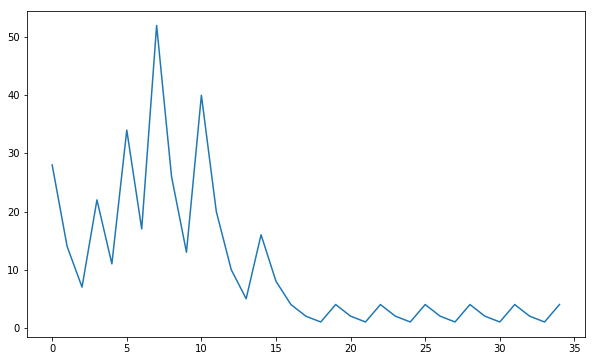

In [55]:
import matplotlib.pyplot as plt
% matplotlib inline

y = 56 # first initial value
#y = 998123456789 # second initial value
T = 35 # number of iterations

xs = range(0,T)
ys = list()

for t in xs:
    if (y%2) == 0:
        y = y / 2
        ys.append(y)
    else:
        y = 3*y +1
        ys.append(y)
        
print(ys)
plt.figure(figsize=(10,6))
plt.plot(xs,ys)